In [28]:
import os

# Set the 'BLINKA_U2IF' environment variable to '1'
# This environment variable is used by circuitPython.
os.environ['BLINKA_U2IF'] = '1'

In [69]:
# One may need to install some packages

#!pip install hidapi pyserial
#!pip install --upgrade adafruit-blinka adafruit-platformdetect

In [71]:
# Import the 'hid' module from hidapi, which provides access to Human Interface Device (HID) devices.
import hid

# Enumerate and retrieve a list of available HID devices.
devices = hid.enumerate()

# Uncomment the line below if you want to see the full 'devices' list.
# print(devices)

# Loop through each HID device in the list and extract information.
for device in devices:
    # Extract information about the device, such as manufacturer, product, vendor ID, and product ID.
    manufacturer_string, product_string, vendor_id, product_id = device["manufacturer_string"], device["product_string"], device['vendor_id'], device['product_id']
    
    # Print the extracted information for each device.
    print(manufacturer_string, product_string, vendor_id, product_id)

  1102 4626
  32903 2590
  1118 0
  1118 0
  32903 2590
  1118 0
  1102 4626
Logitech USB Receiver 1133 50475
Logitech USB Receiver 1133 50475
Logitech USB Receiver 1133 50475
Logitech USB Receiver 1133 50475
Microsoft HIDI2C Device 1102 4639
Logitech USB Receiver 1133 50475
Microsoft HIDI2C Device 1102 4639
Microsoft HIDI2C Device 1102 4639
Microsoft HIDI2C Device 1102 4639
Logitech USB Receiver 1133 50475
Microsoft HIDI2C Device 1102 4639
Logitech USB Receiver 1133 50475
Logitech USB Receiver 1133 50475
Adafruit HID Command channel 9114 241


 # Open HID device from Adafruit or Pico using the vendor ID and product ID.

In [34]:
# Enumerate and retrieve a list of available HID devices.
devices = hid.enumerate()

# Uncomment the line below if you want to see the full 'devices' list.
# print(devices)

# Loop through each HID device in the list and extract information.
for device in devices:
    # Extract information about the device, such as manufacturer, product, vendor ID, and product ID.
    manufacturer_string, product_string, vendor_id, product_id = device["manufacturer_string"], device["product_string"], device['vendor_id'], device['product_id']
    
    # Check if the manufacturer is "Adafruit" or "Pico" (for specific devices).
    if (manufacturer_string == "Adafruit" or manufacturer_string == "Pico"):
        
        # Create an HID device object and open it using the vendor ID and product ID.
        h = hid.device()
        h.open(vendor_id, product_id)
        
        # Print a message indicating that the Microcontroller device is opened.
        print(f"Microcontroller device opened: {manufacturer_string}")

Microcontroller device opened:Adafruit


In [36]:
# We can now open the board
# If this import fails, the device has not been opened properly
import board

In [90]:
# Display the various pins of the board. The pins will vary from one board to another

dir(board)

['A0',
 'A1',
 'A2',
 'D0',
 'D1',
 'D10',
 'D11',
 'D12',
 'D13',
 'D24',
 'D25',
 'D4',
 'D5',
 'D6',
 'D9',
 'I2C',
 'MISO',
 'MOSI',
 'NEOPIXEL',
 'SCK',
 'SCL',
 'SCLK',
 'SDA',
 'SPI',
 '__blinka__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__repo__',
 '__spec__',
 '__version__',
 'ap_board',
 'board_id',
 'detector',
 'pin',
 'sys']

## Import some libraries for microcontroller

In [89]:
import time

# Analog Input/Output
import analogio

# Digital Input/Output
import digitalio

# I2C and SPI Communication
import busio
import adafruit_bus_device


### Example of how to save data and plot using microcontroller

In [43]:
# define a know that correspond the the analog in on A0 pin
knob = analogio.AnalogIn(board.A0)

In [68]:
def get_voltage(raw):
    """
    Calculate the voltage from raw ADC (Analog-to-Digital Converter) data, assuming a 16-bit resolution.

    Args:
        raw (int): The raw ADC data value, ranging from 0 to 65535 (16 bits).

    Returns:
        float: The calculated voltage in volts, based on the 16-bit resolution.
    """
    return (raw * 3.3) / 65535

In [61]:
def get_voltage_with_delay(raw, sleep_time = 0.1):
    time.sleep(sleep_time)
    return get_voltage(raw)

### Save data to a file

In [67]:
filename = "example.txt"

# Define the time delay between measurements
timeDelay = 0.1

# Define the number of measurements to take
N = 100

# Open the file for writing with UTF-8 encoding
file = open(filename, "w", encoding="UTF-8")

# Loop for N measurements
for i in range(N):
    # Get the raw data from the knob
    raw = knob.value
    
    # Calculate the voltage using the get_voltage function
    volts = get_voltage(raw)
    
    # Format the result as a string
    result = "raw = {:5d} volts = {:5.2f} \n".format(raw, volts)
    
    # Write the result to the file
    file.write(result)
    
    # Sleep for the specified time delay
    time.sleep(timeDelay)

# Close the file when finished
file.close()

### Plot data onto a scatter plot

In [72]:
# We can make the code more concise and readable by using list comprehensions and the enumerate function
# we get N values for the x and y
timeDelay=0.1
N=100
x = [i*timeDelay for i in range(N)]
y = [get_voltage_with_delay(knob.value, timeDelay) for _ in t]

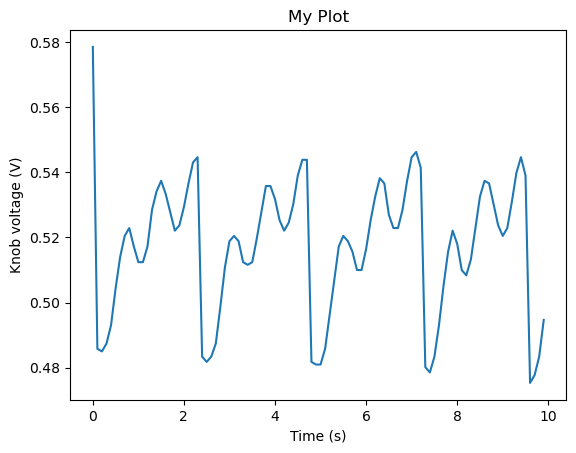

<Figure size 640x480 with 0 Axes>

In [73]:
import matplotlib.pyplot as plt

# Create a Plot
plt.plot(x, y)

# Customize the Plot
plt.xlabel('Time (s)')
plt.ylabel('Knob voltage (V)')
plt.title('My Plot')

# Display the Plot
plt.show()
# OR
plt.savefig('Voltage_vs_time.png')  # Save the plot to a file